In [1]:
# import panda
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read Customer Segments.csv file
df = pd.read_csv(r"C:\Users\amatibag\OneDrive - Genesys Telecommunications Laboratories, Inc\MMDC\Second Year_1st Term\Math for ML Linear Algebra\Data Files\Customer Segments.csv")
df

,CustomerID,Age,Gender,Location,IncomeLevel,SignupDate
0,9207fa75-5758-48d1-94ad-19c041e0520f,51.0,Female,Jensenberg,Low,2022-11-17
1,5fb09cd8-a473-46f7-80bd-6e49cf509078,NaN,Female,Castilloport,High,2020-07-21
2,c139496e-cc89-498a-bd90-1fb4627b6cff,37.0,Male,Lake Jennifertown,NaN,2021-01-01
3,50118139-7264-428f-81cc-a25fddc5d6dd,44.0,Male,Port Carl,Medium,2024-06-10
4,7d1f2bbc-8d16-4fbc-9b37-ece3324e8ed4,50.0,Female,Jessebury,High,2023-08-24
...,...,...,...,...,...,...
3195,bbf7c36f-3745-4d3a-9e33-f927c2755f65,45.0,Female,Roberttown,Medium,2023-02-17
3196,0ef84cc6-0b4c-4c56-bdaa-d6b725ccc08e,40.0,Male,Lisaside,Medium,2022-07-23
3197,0ede97d1-bb46-452d-893e-b63f37da4fa8,NaN,Female,North Christinaport,High,2021-10-16
3198,43ec68f5-4305-4b40-8ced-a187d00bb3f5,26.0,Female,Carrilloport,Low,2022-09-26


## a. Check for duplicate rows and remove them

In [4]:
df = df.drop_duplicates()
df

,CustomerID,Age,Gender,Location,IncomeLevel,SignupDate
0,9207fa75-5758-48d1-94ad-19c041e0520f,51.0,Female,Jensenberg,Low,2022-11-17
1,5fb09cd8-a473-46f7-80bd-6e49cf509078,NaN,Female,Castilloport,High,2020-07-21
2,c139496e-cc89-498a-bd90-1fb4627b6cff,37.0,Male,Lake Jennifertown,NaN,2021-01-01
3,50118139-7264-428f-81cc-a25fddc5d6dd,44.0,Male,Port Carl,Medium,2024-06-10
4,7d1f2bbc-8d16-4fbc-9b37-ece3324e8ed4,50.0,Female,Jessebury,High,2023-08-24
...,...,...,...,...,...,...
3165,48313b18-ccdb-4946-b958-1ebfc92dcc2a,59.0,Male,South Andrea,High,2020-02-26
3178,bbe76a26-234f-4a70-b71f-fa9b183f6353,Unknown,Male,Gregoryfurt,High,2020-06-23
3183,7eb7f7df-9b0a-416a-829e-bcf4d8bd57dc,55.0,Male,New Anthonyland,High,2022-07-23
3186,ce5cf079-859b-43fa-9609-c6bb7e12c6b7,41.0,Female,Adrianhaven,Low,2024-01-10


## b. Identify columns with missing values and decide how to handle them.


In [6]:
df.isnull().sum()

CustomerID       0
Age            276
Gender           0
Location         0
IncomeLevel    285
SignupDate       0
dtype: int64

In [7]:
df.isnull().sum().sum()

561

In [8]:
# Create df2 from df
df2 = df.copy()

# Replace null values in Age with the mean and convert to int
df2['Age'] = pd.to_numeric(df2['Age'], errors='coerce')  # Convert to numeric, forcing errors to NaN
mean_age = df2['Age'].mean()
df2['Age'] = df2['Age'].fillna(mean_age).astype(int)  # Fill NaN and convert to int

# Replace null values in IncomeLevel with 'Unknown'
df2['IncomeLevel'] = df2['IncomeLevel'].fillna('Unknown')

In [9]:
df2.isnull().sum()

CustomerID     0
Age            0
Gender         0
Location       0
IncomeLevel    0
SignupDate     0
dtype: int64

In [10]:
df2.isnull().sum().sum()

0

In [11]:
df2

,CustomerID,Age,Gender,Location,IncomeLevel,SignupDate
0,9207fa75-5758-48d1-94ad-19c041e0520f,51,Female,Jensenberg,Low,2022-11-17
1,5fb09cd8-a473-46f7-80bd-6e49cf509078,45,Female,Castilloport,High,2020-07-21
2,c139496e-cc89-498a-bd90-1fb4627b6cff,37,Male,Lake Jennifertown,Unknown,2021-01-01
3,50118139-7264-428f-81cc-a25fddc5d6dd,44,Male,Port Carl,Medium,2024-06-10
4,7d1f2bbc-8d16-4fbc-9b37-ece3324e8ed4,50,Female,Jessebury,High,2023-08-24
...,...,...,...,...,...,...
3165,48313b18-ccdb-4946-b958-1ebfc92dcc2a,59,Male,South Andrea,High,2020-02-26
3178,bbe76a26-234f-4a70-b71f-fa9b183f6353,45,Male,Gregoryfurt,High,2020-06-23
3183,7eb7f7df-9b0a-416a-829e-bcf4d8bd57dc,55,Male,New Anthonyland,High,2022-07-23
3186,ce5cf079-859b-43fa-9609-c6bb7e12c6b7,41,Female,Adrianhaven,Low,2024-01-10


## c. Ensure columns have the appropriate data types.

In [13]:
print(df2.dtypes)

CustomerID     object
Age             int32
Gender         object
Location       object
IncomeLevel    object
SignupDate     object
dtype: object


In [14]:
# Convert SignupDate to datetime format
df2['SignupDate'] = pd.to_datetime(df2['SignupDate'], errors='coerce')

In [15]:
df2.isnull().sum()

CustomerID      0
Age             0
Gender          0
Location        0
IncomeLevel     0
SignupDate     98
dtype: int64

In [16]:
# unable to find a way to fix the 98 rows that has different format. Decided to drop the data instead

df2 = df2.dropna()

In [17]:
df2.isnull().sum()

CustomerID     0
Age            0
Gender         0
Location       0
IncomeLevel    0
SignupDate     0
dtype: int64

In [18]:
print(df2.dtypes)

CustomerID             object
Age                     int32
Gender                 object
Location               object
IncomeLevel            object
SignupDate     datetime64[ns]
dtype: object


In [19]:
df2

,CustomerID,Age,Gender,Location,IncomeLevel,SignupDate
0,9207fa75-5758-48d1-94ad-19c041e0520f,51,Female,Jensenberg,Low,2022-11-17
1,5fb09cd8-a473-46f7-80bd-6e49cf509078,45,Female,Castilloport,High,2020-07-21
2,c139496e-cc89-498a-bd90-1fb4627b6cff,37,Male,Lake Jennifertown,Unknown,2021-01-01
3,50118139-7264-428f-81cc-a25fddc5d6dd,44,Male,Port Carl,Medium,2024-06-10
4,7d1f2bbc-8d16-4fbc-9b37-ece3324e8ed4,50,Female,Jessebury,High,2023-08-24
...,...,...,...,...,...,...
3165,48313b18-ccdb-4946-b958-1ebfc92dcc2a,59,Male,South Andrea,High,2020-02-26
3178,bbe76a26-234f-4a70-b71f-fa9b183f6353,45,Male,Gregoryfurt,High,2020-06-23
3183,7eb7f7df-9b0a-416a-829e-bcf4d8bd57dc,55,Male,New Anthonyland,High,2022-07-23
3186,ce5cf079-859b-43fa-9609-c6bb7e12c6b7,41,Female,Adrianhaven,Low,2024-01-10


## Exploratory Data Analysis (EDA)


In [21]:
#remove the decimal for Age
pd.set_option('display.float_format', lambda x:'%.0f' % x)

In [22]:
df3 = df2.copy()

# add month column
df3['Month'] = df2['SignupDate'].dt.month_name()

# add year column
df3['Year'] = df2['SignupDate'].dt.year

In [23]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 3195
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerID   2925 non-null   object        
 1   Age          2925 non-null   int32         
 2   Gender       2925 non-null   object        
 3   Location     2925 non-null   object        
 4   IncomeLevel  2925 non-null   object        
 5   SignupDate   2925 non-null   datetime64[ns]
 6   Month        2925 non-null   object        
 7   Year         2925 non-null   int32         
dtypes: datetime64[ns](1), int32(2), object(5)
memory usage: 182.8+ KB


In [24]:
df3.describe()

,Age,SignupDate,Year
count,2925,2925,2925
mean,45,2022-01-11 15:05:50.769230848,2022
min,-1,2019-07-01 00:00:00,2019
25%,33,2020-09-22 00:00:00,2020
50%,45,2022-01-08 00:00:00,2022
75%,57,2023-05-05 00:00:00,2023
max,150,2024-06-30 00:00:00,2024
std,19,NaN,2


In [25]:
df3.nunique()

CustomerID     2914
Age              55
Gender            2
Location       2625
IncomeLevel       4
SignupDate     1447
Month            12
Year              6
dtype: int64

In [26]:
df3.sort_values(by="SignupDate")

,CustomerID,Age,Gender,Location,IncomeLevel,SignupDate,Month,Year
2592,32ac11aa-a64e-463e-a6f7-37ce1c10f2cf,43,Female,East Matthew,Low,2019-07-01,July,2019
2096,b92224a4-fa0d-4e99-ab1a-9f76360a4e33,45,Female,Jacksonton,Medium,2019-07-01,July,2019
2298,9ccd2f9d-6d29-4861-b76c-22ef1d53fc26,45,Female,East Bruce,Medium,2019-07-02,July,2019
1848,17136d95-b3c1-425e-b206-778af63ad9d7,27,Male,Norrisstad,Medium,2019-07-03,July,2019
713,6596f49d-5c9f-4bcd-84a0-82d866b98314,26,Female,New Peterchester,High,2019-07-04,July,2019
...,...,...,...,...,...,...,...,...
1597,8f95b24b-b425-4717-83ca-c2fccb6a6ea5,45,Male,West Shawnview,High,2024-06-29,June,2024
2751,418354d2-ebb2-42d4-b789-4bea92bda55f,63,Female,Moranberg,Medium,2024-06-29,June,2024
2056,35c92647-8109-4097-a6cd-ae3aca6b16ba,57,Female,West Harryland,Medium,2024-06-30,June,2024
1960,f3d24254-2198-4838-8ef3-494090b9c5de,30,Male,South Taylor,High,2024-06-30,June,2024


In [27]:
# Frequency counts for categorical variables in Customer Segments
gender_counts = df3['Gender'].value_counts()
location_counts = df3['Location'].value_counts()
income_level_counts = df3['IncomeLevel'].value_counts()
month_counts = df3['Month'].value_counts()
year_counts = df3['Year'].value_counts()

print("Gender Counts:\n", gender_counts)
print("Location Counts:\n", location_counts)
print("Income Level Counts:\n", income_level_counts)
print("Month Counts:\n", month_counts)
print("Month Counts:\n", year_counts)

Gender Counts:
 Gender
Female    1474
Male      1451
Name: count, dtype: int64
Location Counts:
 Location
Port Michael     5
West Robert      4
West Michael     4
Michaelville     4
Port Eric        4
                ..
Savagestad       1
Samanthaville    1
Donnahaven       1
Sylviabury       1
Roberttown       1
Name: count, Length: 2625, dtype: int64
Income Level Counts:
 IncomeLevel
High       919
Low        896
Medium     836
Unknown    274
Name: count, dtype: int64
Month Counts:
 Month
January      270
September    252
August       251
July         248
December     248
February     247
October      247
March        247
June         237
May          231
November     230
April        217
Name: count, dtype: int64
Month Counts:
 Year
2023    595
2020    580
2021    577
2022    555
2024    327
2019    291
Name: count, dtype: int64


In [28]:
df3['Age'] = df3['Age'].apply(lambda x: 18 if x < 18 else (65 if x > 65 else x))

In [29]:
df3.describe()

,Age,SignupDate,Year
count,2925,2925,2925
mean,44,2022-01-11 15:05:50.769230848,2022
min,18,2019-07-01 00:00:00,2019
25%,33,2020-09-22 00:00:00,2020
50%,45,2022-01-08 00:00:00,2022
75%,57,2023-05-05 00:00:00,2023
max,65,2024-06-30 00:00:00,2024
std,14,NaN,2


## Charts

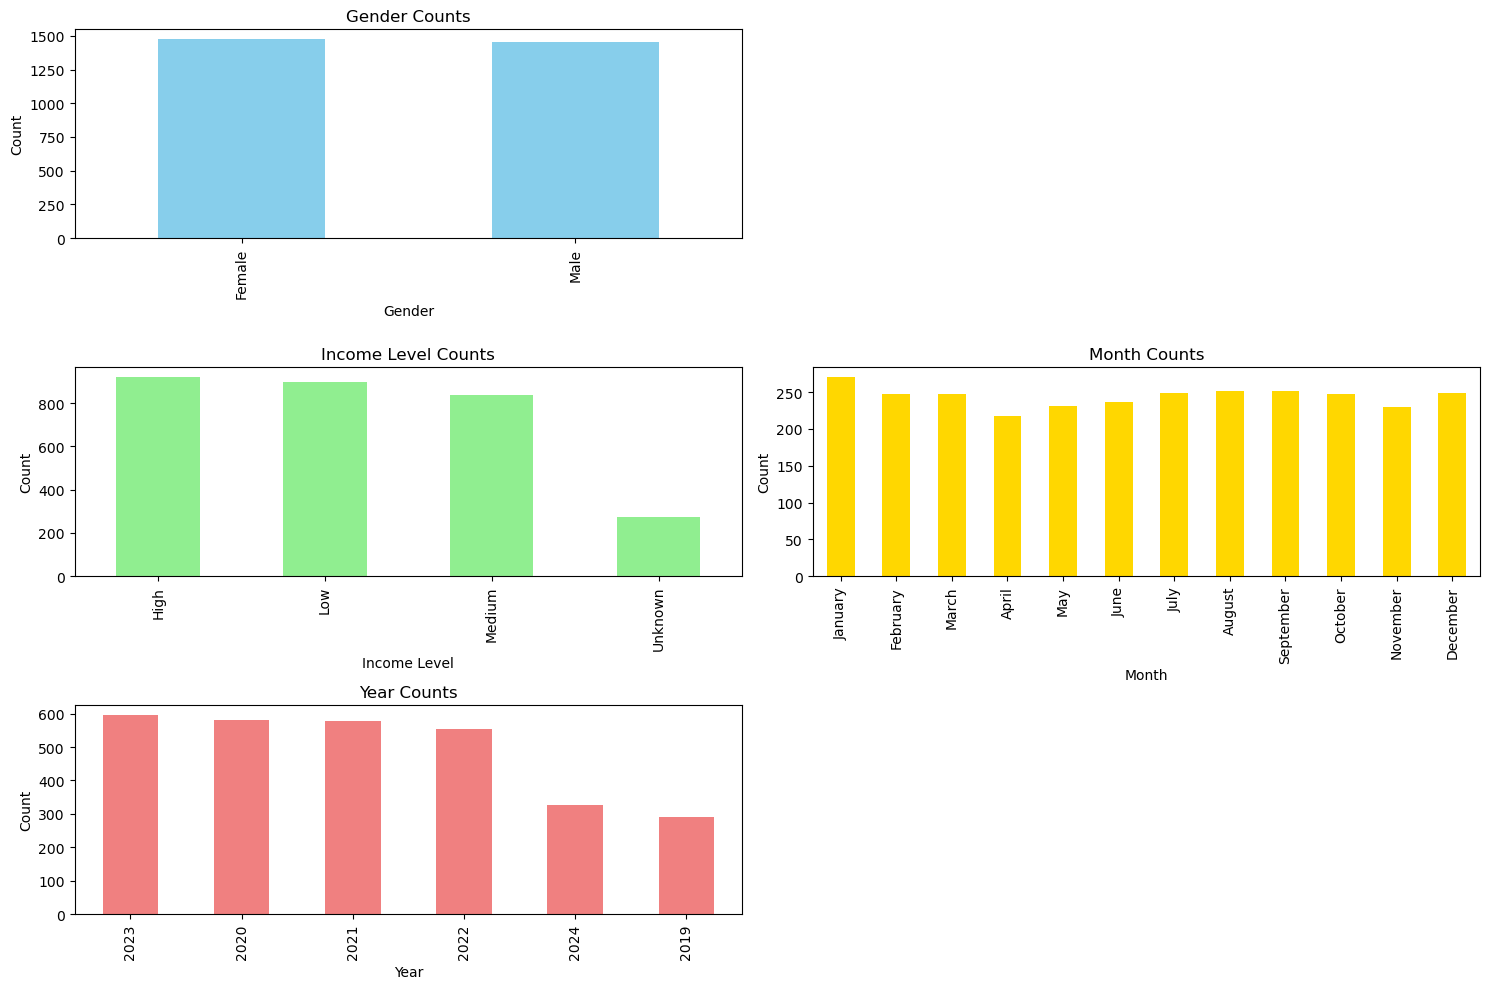

In [58]:
# Ensure month counts are sorted properly
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
month_counts = month_counts.reindex(month_order).fillna(0)  # Reindex to ensure proper order

# Set up the plots
plt.figure(figsize=(15, 10))

# Gender Counts
plt.subplot(3, 2, 1)
gender_counts.plot(kind='bar', color='skyblue')
plt.title('Gender Counts')
plt.xlabel('Gender')
plt.ylabel('Count')

# Income Level Counts
plt.subplot(3, 2, 3)
income_level_counts.plot(kind='bar', color='lightgreen')
plt.title('Income Level Counts')
plt.xlabel('Income Level')
plt.ylabel('Count')

# Month Counts
plt.subplot(3, 2, 4)
month_counts.plot(kind='bar', color='gold')
plt.title('Month Counts')
plt.xlabel('Month')
plt.ylabel('Count')

# Year Counts
plt.subplot(3, 2, 5)
year_counts.plot(kind='bar', color='lightcoral')
plt.title('Year Counts')
plt.xlabel('Year')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()